In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =  pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#df[df.trestbps > 180]
#df[df.chol > 400]

df[(df.trestbps > 180) | (df.chol > 400)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


# Data Visualisation

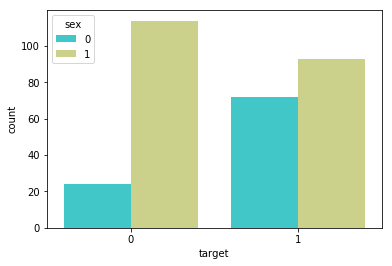

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', hue = 'sex', data = df, palette='rainbow')

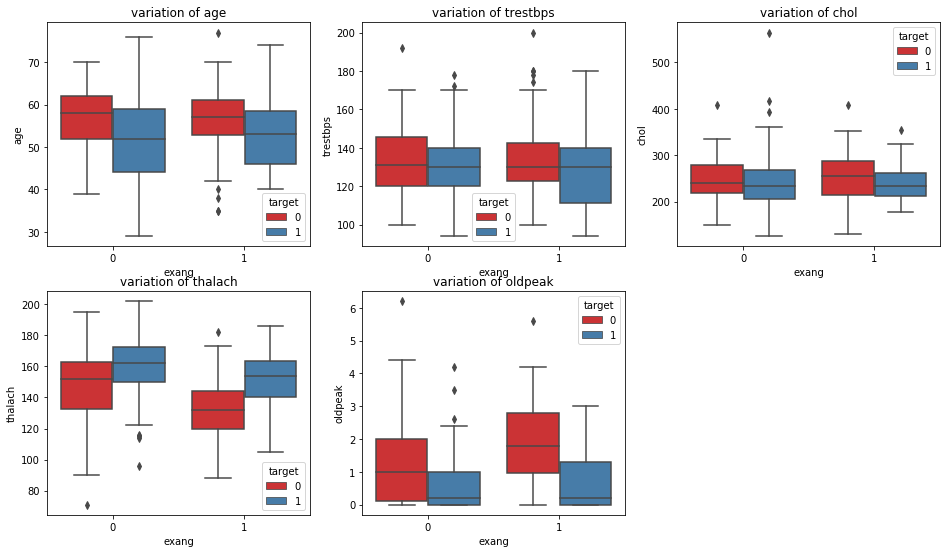

In [7]:
j =0
plt.figure(figsize=(16,14))

for i in ['age','trestbps','chol','thalach','oldpeak']:
    j=j+1
    plt.subplot(3,3,j)
    plt.title('variation of %s' %i)
    sns.boxplot(y = i,x ='exang',hue='target',data = df,palette='Set1')

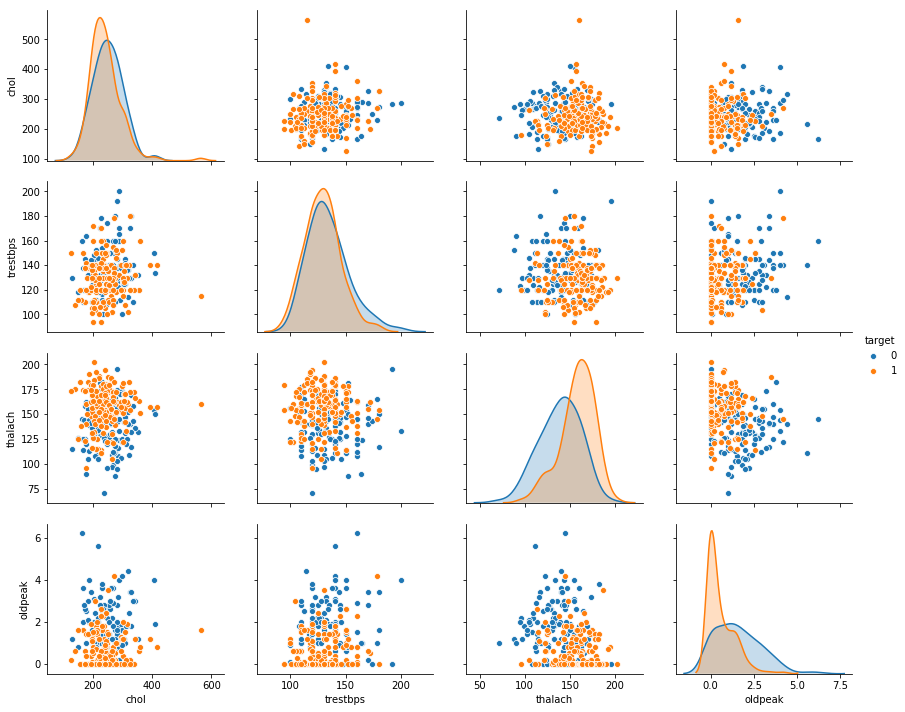

In [8]:
sns.pairplot(hue ='target', vars = ['chol','trestbps','thalach','oldpeak'] , data = df,height =2.5,aspect=1.2)

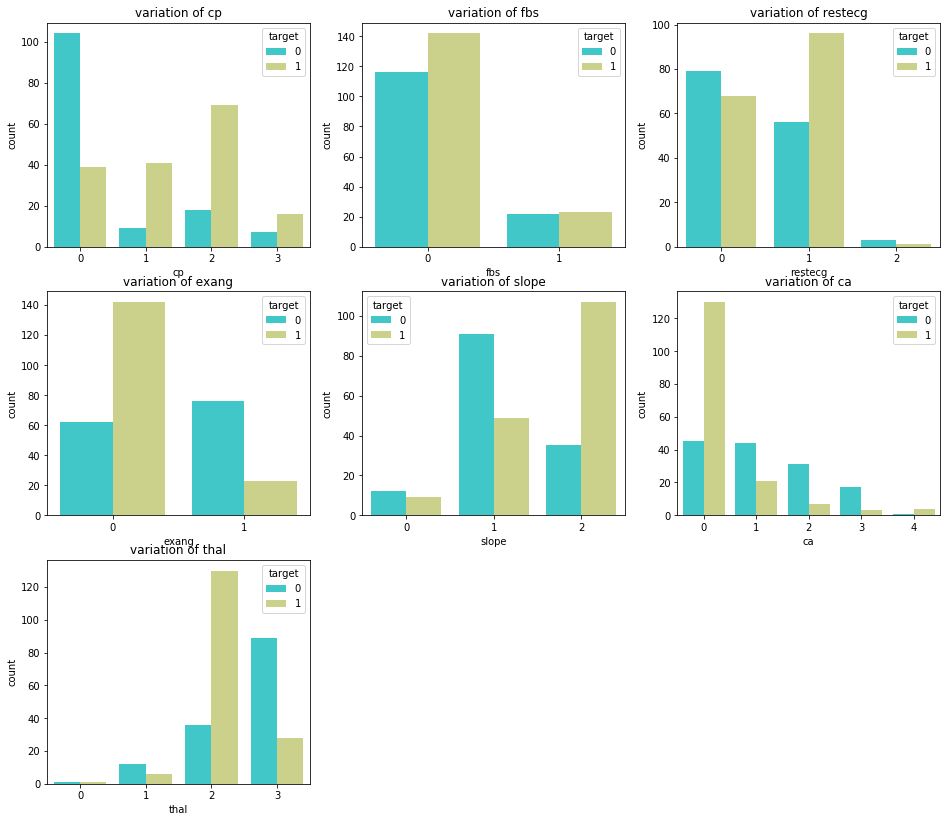

In [9]:
j=0
plt.figure(figsize=(16,14))

for i in ['cp', 'fbs', 'restecg', 'exang', 'slope','ca', 'thal']:
    j=j+1
    plt.subplot(3,3,j)
    plt.title('variation of %s' %i)
    sns.countplot(i, hue ='target', data = df,palette='rainbow')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('target', axis =1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state =8)

#  Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train, y_train)
res_nb = nb.predict(X_test)


print ('train score  : %.3f' %nb.score(X_train,y_train))
print ('test score   : {:.3f}'.format(nb.score(X_test,y_test)))
confusion_matrix(y_test, res_nb)

train score  : 0.822
test score   : 0.852


array([[21,  1],
       [ 8, 31]])

# Logistic regression

In [12]:
logr = LogisticRegression(C = 0.2,solver='liblinear', max_iter=10000).fit(X_train, y_train)
res_logr = logr.predict(X_test)

print ('train score  : %.3f' %logr.score(X_train,y_train))
print ('test score   : {:.3f}'.format(logr.score(X_test,y_test)))

train score  : 0.851
test score   : 0.885


In [13]:
confusion_matrix(y_test, res_logr)

array([[20,  2],
       [ 5, 34]])

# Cross Vald

In [14]:
scores = cross_val_score(logr, X_train, y_train, cv =10, scoring='accuracy')
print(scores)
print('\n',scores.mean())

[0.8        0.84       0.84       0.88       0.72       0.76
 0.82608696 0.95652174 0.82608696 0.73913043]

 0.8187826086956521


# SVM

In [15]:
from sklearn.svm import SVC

sv = SVC(C= 2, gamma= 0.1, kernel= 'linear').fit(X_train, y_train)
res_sv = sv.predict(X_test)

In [16]:
print ('train score  : %.3f' %sv.score(X_train,y_train))
print ('test score   : {:.3f}'.format(sv.score(X_test,y_test)))

confusion_matrix(y_test, res_sv)

train score  : 0.876
test score   : 0.869


array([[20,  2],
       [ 6, 33]])

In [17]:
scores = cross_val_score(sv, X_train, y_train, cv =8, scoring='accuracy')
print(scores)
print(scores.mean())

[0.77419355 0.87096774 0.87096774 0.83870968 0.76666667 0.93333333
 0.79310345 0.79310345]
0.8301307007786429


# Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier

rft = RandomForestClassifier(n_estimators=10, max_depth=3, max_features=12,random_state=2).fit(X_train, y_train)
res_rft = rft.predict(X_test)

In [19]:
print ('train score  : %.3f' %rft.score(X_train,y_train))
print ('test score   : {:.3f}'.format(rft.score(X_test,y_test)))
confusion_matrix(y_test, res_rft)

train score  : 0.880
test score   : 0.820


array([[16,  6],
       [ 5, 34]])